In [1]:
import tensorflow as tf # for: tf.tanh
# tf.compat.v1.enable_eager_execution()
print(tf.__version__)
print(tf.executing_eagerly())

C:\Users\chaa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


2.13.0
True


In [2]:
import sys
# print(sys.path)
sys.path.insert(0,'..')
# print(sys.path)

In [6]:
# загружаем задачу Prob_tf1_FnL_1D_HJB_BS_ICexp
# 
from Prob_tf1_FnL_1D_HJB_BS_TCexp import Prob_tf1_FnL_1D_HJB_BS_TCexp as Prob_HJB_BS ## выключает ЕЕ tf.compat.v1.disable_eager_execution()
print(tf.executing_eagerly())
print( Prob_HJB_BS.__doc__ )
print( Prob_HJB_BS.__init__.__doc__ )

ImportError: cannot import name 'Prob_tf1_FnL_1D_HJB_BS_TCexp' from 'Prob_tf1_FnL_1D_HJB_BS_TCexp' (C:\Users\chaa\Documents\_iPyNB\___diss_ipynb\non-linear_eq_solution\__FBSNNs_MY\_my FnLPDEs_FBSNNs\FBSNNs_tf1_FnL_1D\probs,tests_tf1_FnL_1D\Prob_tf1_FnL_1D_HJB_BS_TCexp.py)

In [ ]:
from FBSNNs_tf1 import FBSNN_tf1
print(FBSNN_tf1.__doc__)
print(FBSNN_tf1.__init__.__doc__)
print(FBSNN_tf1.loss_function.__doc__)

In [5]:
import numpy as np # for: np.array
import tensorflow as tf # for: tf.tanh

In [6]:
## model
M = 100 # number of trajectories (batch size)
N = 10 # 20 # 50 # number of time snapshots

layer_size = 32 # 64 # 32 # 256
HL = 3 # 4    
hlayers = HL*[layer_size] 
print( hlayers )

Xi = np.array([[0.5]]) #  np.array([1.0,0.5]*int(D/2))[None,:]
print(Xi.shape, Xi)
T = 1.0 # 0.6 # 1.0
s = 0.0 # 0.8 # 0.5
act_func_name = 'ReLU' # 'tanh'  # 
act_func = tf.nn.relu # tf.tanh # tf.sin 

model = Prob_HJB_BS(Xi, T,   M, N,   hlayers, act_func = act_func, s=s, 
                                     mu=0.02, sigma=0.1,
                                     gamma=0.5)
model.loss_n = 1 # 0 
model.flag_v1eqDu = False # True # False
model.act_func_name = act_func_name

print( f'model = {model}' )
print( f'model.loss_n = {model.loss_n}' )
print( f'model.tool = {model.tool}' )
print( f"hasattr(self, 'act_func')={hasattr(model, 'act_func')}" )
print( f'model.loss_history={model.loss_history}, model.it_loss_history={model.it_loss_history}' )
# print(model.net_out_size, model.flag_v1eqDu)
print( f'model.flag_v1eqDu={model.flag_v1eqDu}' )

[32, 32, 32]
(1, 1) [[0.5]]
Device mapping: no known devices.
model = model_FnL_1D_HJB_BS__ICexp: s=0.0, T=1.0, D=1, Xi[0:1]=[[0.5]]; 	 N=10; 
	 NNparams: M=100, layers=[2, 32, 32, 32, 2], act_func=<function relu at 0x000001D01E491CA0>, optimizer=<tensorflow.python.training.adam.AdamOptimizer object at 0x000001D02842CE80>; 
	 Learning: it=0; 
	 HJB_BS: mu=0.02, sigma=0.1; IC: u(T,x)=-exp(-gamma*x), gamma=0.5
model.loss_n = 1
model.tool = tensorflow 1x
hasattr(self, 'act_func')=True
model.loss_history=[], model.it_loss_history=10
model.flag_v1eqDu=False


In [7]:
# act_func_name = 'ReLU'; model.act_func_name = act_func_name
model.u_exact(s, Xi), model.Du_exact(s, Xi), 

(array([[-0.76337949]]), array([[0.38168975]]))

In [8]:
model.loss_n = 0 # -1 # -2
model.weights0, model.biases0 = model.weights, model.biases
model.weights, model.biases = model.initialize_NN(model.layers)  # веса почему-то не сбрасываются
print( type(model.weights), len(model.weights) )
print( type(model.weights[0]) )
model.weights1, model.biases1 = model.weights, model.biases
print( model.weights1[0]-model.weights0[0], model.biases1[0]-model.biases0[0] )
### print( model.sess.run([model.weights[0]]) )
print(len(model.loss_history), model.it_loss_history)


<class 'list'> 4
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
Tensor("sub_44:0", shape=(2, 32), dtype=float32) Tensor("sub_45:0", shape=(1, 32), dtype=float32)
0 10


In [9]:
# TODO распечатать model.weights[0]
print( model.weights0[0] )
print( model.weights[0].eval(session=model.sess) ) #.as_default()) )
# print( model.weights[0].eval(session=model.sess.as_default()) )
# print( model.weights[0].numpy() ) ## NotImplementedError: numpy() is only available when eager execution is enabled.

<tf.Variable 'Variable:0' shape=(2, 32) dtype=float32>


FailedPreconditionError: Graph execution error:

Detected at node 'Variable_8/Read/ReadVariableOp' defined at (most recent call last):
    File "C:\Users\chaa\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\chaa\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\chaa\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\chaa\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\chaa\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\chaa\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-8-4f63a9386bf7>", line 3, in <module>
      model.weights, model.biases = model.initialize_NN(model.layers)  # веса почему-то не сбрасываются
    File "..\FBSNNs_tf1.py", line 95, in initialize_NN
      self.weights, self.biases = super().initialize_NN(layers)
    File "..\FBSNNs.py", line 71, in initialize_NN
      W = self.xavier_init(size=[layers[l], layers[l+1]])
    File "..\FBSNNs.py", line 81, in xavier_init
      return tf.Variable(tf.random.truncated_normal([in_dim, out_dim],
Node: 'Variable_8/Read/ReadVariableOp'
Could not find variable Variable_8. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Resource localhost/Variable_8/class tensorflow::Var does not exist.
	 [[{{node Variable_8/Read/ReadVariableOp}}]]

Original stack trace for 'Variable_8/Read/ReadVariableOp':
  File "C:\Users\chaa\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\chaa\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\chaa\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\chaa\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\chaa\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\chaa\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "C:\Users\chaa\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\chaa\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    result = self._run_cell(
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
    return runner(coro)
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\chaa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-4f63a9386bf7>", line 3, in <module>
    model.weights, model.biases = model.initialize_NN(model.layers)  # веса почему-то не сбрасываются
  File "..\FBSNNs_tf1.py", line 95, in initialize_NN
    self.weights, self.biases = super().initialize_NN(layers)
  File "..\FBSNNs.py", line 71, in initialize_NN
    W = self.xavier_init(size=[layers[l], layers[l+1]])
  File "..\FBSNNs.py", line 81, in xavier_init
    return tf.Variable(tf.random.truncated_normal([in_dim, out_dim],
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 194, in __call__
    variable_call = cls._variable_call(*args, **kwargs)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1215, in _variable_call
    return previous_getter(
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1208, in <lambda>
    previous_getter = lambda **kws: default_variable_creator_v2(None, **kws)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 356, in default_variable_creator_v2
    return ResourceVariable(
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 197, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 1810, in __init__
    self._init_from_args(
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 2052, in _init_from_args
    value = gen_resource_variable_ops.read_variable_op(handle, dtype)
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 595, in read_variable_op
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\chaa\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3381, in _create_op_internal
    ret = Operation.from_node_def(


In [ ]:
model.weights, model.biases = model.initialize_NN(model.layers) 

In [ ]:
model.train(N_Iter = 10, learning_rate=1e-2, it_print=100)

In [ ]:
# model.iterations = 0

In [10]:
# Training
# model.train(N_Iter = 10, learning_rate=1e-3, it_print=1)
model.train(N_Iter = 10*10**2-10*0, learning_rate=1e-2, it_print=100)
print( f'model.iterations={model.iterations}' )
# print( f'model.loss = {model.loss.eval()}' )

ValueError: NaN loss value! it=20
 

In [103]:
# model.iterations = 1000

In [73]:
# Training
model.train(N_Iter = 10*10**2, learning_rate=1e-3, it_print=100)
print( f'model.iterations={model.iterations}' )
# print( f'model.loss = {model.loss.eval()}' )

It: 2100, Loss: 6.105e-01, Y0: [-0.406523, -0.26312232], Time: 1.16, Learning Rate: 1.000e-03
It: 2200, Loss: 6.215e-01, Y0: [-0.4068424, -0.26306674], Time: 1.12, Learning Rate: 1.000e-03
It: 2300, Loss: 6.470e-01, Y0: [-0.40726495, -0.26297253], Time: 1.13, Learning Rate: 1.000e-03
It: 2400, Loss: 5.985e-01, Y0: [-0.4071312, -0.26300716], Time: 1.14, Learning Rate: 1.000e-03
It: 2500, Loss: 6.069e-01, Y0: [-0.40718323, -0.26297736], Time: 1.13, Learning Rate: 1.000e-03
It: 2600, Loss: 6.275e-01, Y0: [-0.40743896, -0.26297984], Time: 1.13, Learning Rate: 1.000e-03
It: 2700, Loss: 6.170e-01, Y0: [-0.40714628, -0.2630117], Time: 1.13, Learning Rate: 1.000e-03
It: 2800, Loss: 6.301e-01, Y0: [-0.40793744, -0.26304048], Time: 1.12, Learning Rate: 1.000e-03
It: 2900, Loss: 6.986e-01, Y0: [-0.40861902, -0.26296714], Time: 1.13, Learning Rate: 1.000e-03
It: 3000, Loss: 6.734e-01, Y0: [-0.40884075, -0.26299226], Time: 1.18, Learning Rate: 1.000e-03
model.iterations=3000


In [57]:
t_test, W_test = model.fetch_minibatch()
X_pred, YV_pred = model.predict(Xi, t_test, W_test)
print(t_test.shape, X_pred.shape)

(100, 11, 1) (100, 11, 1)


In [58]:
import matplotlib.pyplot as plt
# from plotting import newfig, savefig      ## рушить постройку графиков

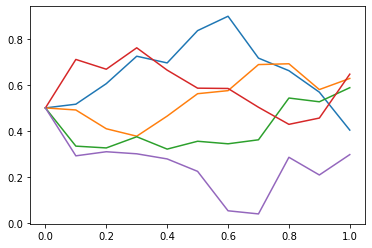

In [59]:
sa=5 # samples
plt.plot( t_test[0:sa,:,0].T, X_pred[0:sa,:,0].T )

In [60]:
# print(model.loss_history)
lh_arr = np.array(model.loss_history).T
print( lh_arr.shape )
# print( lh_arr )

(2, 600)


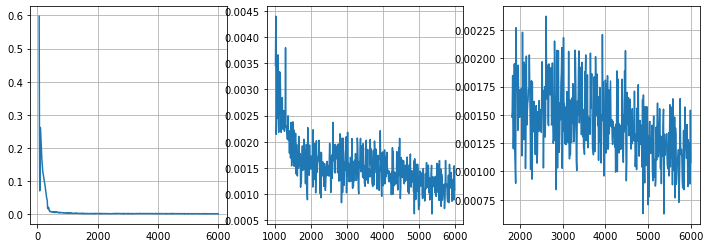

In [61]:
f, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
_it=5
ax1.plot( lh_arr[0,_it:], lh_arr[1,_it:] )
ax1.grid()
_it=100
ax2.plot( lh_arr[0,_it:], lh_arr[1,_it:] )
ax2.grid()
_it=180
ax3.plot( lh_arr[0,_it:], lh_arr[1,_it:] )
ax3.grid()

In [62]:
def test_predict(model, Xi):
    t_test, W_test = model.fetch_minibatch()
    X_pred, YV_pred = model.predict(Xi, t_test, W_test)
    Y_pred = YV_pred[0]
    V1_pred = YV_pred[1]
    # X_pred1, Y_pred1 = model.predict1(Xi, t_test, W_test)
    # print( max( np.abs(X_pred-X_pred1) ), max( np.abs(Y_pred-Y_pred1) ) )

    Y_test = np.reshape(model.u_exact(np.reshape(t_test[0:M,:,:],[-1,1]), np.reshape(X_pred[0:M,:,:],[-1,model.D])), [M,-1,1])
    V_test = np.reshape(model.Du_exact(np.reshape(t_test[0:M,:,:],[-1,1]), np.reshape(X_pred[0:M,:,:],[-1,model.D])), [M,-1,1])

    resY = (t_test, X_pred, Y_pred, Y_test)
    resV1 = (t_test, X_pred, V1_pred, V_test)
    print( f'Xi = {Xi}' )
    print(t_test.shape, Y_test.shape, YV_pred.shape, Y_pred.shape, X_pred.shape)
    print(t_test.shape, Y_test.shape, YV_pred.shape, Y_pred.shape, X_pred.shape)
    return resY, resV1

In [63]:
##### PLOT RESULTS

# Xi = np.array([[0.1]])  
resY, resV1 = test_predict(model, Xi)

(t_test, X_pred, Y_pred, Y_test) = resY
(t_test, X_pred, V1_pred, V_test) = resV1

Xi = [[0.5]]
(100, 11, 1) (100, 11, 1) (2, 100, 11, 1) (100, 11, 1) (100, 11, 1)
(100, 11, 1) (100, 11, 1) (2, 100, 11, 1) (100, 11, 1) (100, 11, 1)


[[0.  0.1 0.2 0.3 0.4 0.5]]

[[-0.77561116 -0.77275115 -0.781184   -0.7989745  -0.8262897  -0.83930427]]
[[-0.76337944 -0.76119369 -0.77754842 -0.8056918  -0.83351277 -0.84279638]]

[[0.37390947 0.37818754 0.3860066  0.39759237 0.41683042 0.42438304]]
[[0.38168972 0.38059684 0.38877421 0.4028459  0.41675639 0.42139819]]


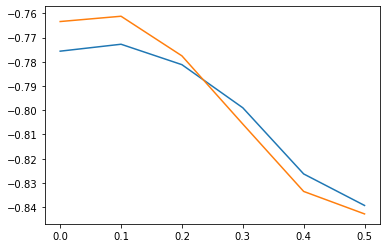

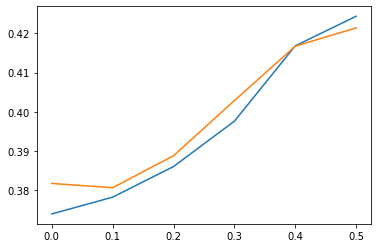

In [64]:
_t = 6
print(t_test[0,0:_t,:].T, '', Y_pred[0,0:_t,:].T, Y_test[0,0:_t,:].T, '', V1_pred[0,0:_t,:].T, V_test[0,0:_t,:].T, sep='\n' )
# print( type(Y_pred), len(Y_pred), Y_pred.shape )
# print( type(Y_pred[0]), Y_pred[0].shape )

plt.plot( t_test[0,0:_t,:], Y_pred[0,0:_t,:] )
plt.plot( t_test[0,0:_t,:], Y_test[0,0:_t,:] )
plt.figure()
plt.plot( t_test[0,0:_t,:], V1_pred[0,0:_t,:] )
plt.plot( t_test[0,0:_t,:], V_test[0,0:_t,:] )

In [65]:
from FBSNNs_plots import *

In [66]:
def plot_results(model, res, r=range(0,5), flag_err_info=0, u_name='u', Y_name='Y', ax = None):
    '''
    plot_results(model, res, r=range(0,5), flag_err_info=0, u_name='u', Y_name='Y', ax = None)
    вывод траекторий в заданной области
    '''
    t_test, X_pred, Y_pred, Y_test = res
    # в классе FBSNN нет аттрибутов name, s
    name_ = 'FBSNNs' if not hasattr(model, 'name') else model.name
    s_ = 0 if not hasattr(model, 's') else model.s # s=0
    ## s_ = t_test[0,0,0] if not hasattr(model, 's') else model.s # взять s из t_test 
    # в классе FBSNN_tf1 есть аттрибуты name, s   
    rmin = min(r)
    rmax = max(r)+1
    if ax is None:
        f,ax = plt.subplots(1,1) ## 
    # 0-я траектория 
    ax.plot(t_test[rmin,:,0].T,Y_pred[rmin,:,0].T,'b',label=f'Learned ${u_name}(t,X_t)$')
    ax.plot(t_test[rmin,:,0].T,Y_test[rmin,:,0].T,'r--',label=f'Exact ${u_name}(t,X_t)$')
    ax.plot(t_test[rmin,-1,0],Y_test[rmin,-1,0],'ks',label=f'${Y_name}_T = {u_name}(T,X_T)$')
    # остальные траектории
    ax.plot(t_test[rmin+1:rmax,:,0].T, Y_pred[rmin+1:rmax,:,0].T, 'b')
    ax.plot(t_test[rmin+1:rmax,:,0].T, Y_test[rmin+1:rmax,:,0].T, 'r--')
    ax.plot(t_test[rmin+1:rmax,-1,0],  Y_test[rmin+1:rmax,-1,0],  'ks')

    # plt.plot([s_],Y_test[0,0,0],'ks',label = f'$Y_s = Y_\{{s_}\}=u(\{{s_}\},X_\{{s_}\}=\\xi)$')
    ax.plot([s_],Y_test[0,0,0],'ko',
             label = f'${Y_name}_s = {Y_name}_' + '{' + f'{s_}' + '}' + f'={u_name}(' +'{' + f'{s_}' + '},X_{' + f'{s_}' + '}=\\xi)$')
    
    ax.set_xlabel('$t$') # plt.xlabel('$t$')
    ax.set_ylabel(f'${Y_name}_t = {u_name}(t,X_t)$') # plt.ylabel(f'${Y_name}_t = {u_name}(t,X_t)$')
    
    rel_err_t0 = abs( (Y_pred[0,0,0]-Y_test[0,0,0])/Y_test[0,0,0] ) # ошибка в значении u(0, xi)
    it,loss = np.array(model.loss_history).T[:,-1]
    nn_info1 = f'N={model.N}, M={model.M}, layers={model.layers}, \n act_f={model.act_func_name}, it={it}, loss={loss:.4e}\n'
    nn_info2 = ''
    # if hasattr(model, 'loss_n'): nn_info2 = nn_info2 + f'loss_n = {model.loss_n}   '
    # if hasattr(model, 'flag_v1eqDu'): nn_info2 = nn_info2 + f'v1eqDu={model.flag_v1eqDu}'
    if nn_info2 != '': nn_info2 = nn_info2 +'\n'
    if flag_err_info == 1:
        err_info = ' $rel\_err_{t=' + f'{s_}'+'}$ = '+f'{rel_err_t0:.4e}' 
        # err_info = 'err_info' + ' $rel\_err_{t=' + f'{s_}'+'}$ = '+f'{rel_err_t0:.4f}' 
        ''' err_info = f' rel_err = {calc_error_point(Y_pred, Y_test, r)[3]} \n' +
              f' $||rel\_err||_1$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=1)} \n' +
              f' $||rel\_err||_2$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=2)} \n' +
              f' $||rel\_err||_\infty$ = {calc_rel_error_traj(Y_pred, Y_test, r, norm_ord=np.inf)} \n' +
              ' $rel\_err_{t=0}$ = '+f'{rel_err_t0:.4f}' 
        '''
    else: err_info = ''
    ax.set_title( f'{model.D}-dim {name_} \n(trajectories={r}) \n' + nn_info1 + nn_info2 + err_info )
    ax.legend()
    ax.grid()
    return ax

In [67]:
t_test, X_pred, Y_pred, Y_test = resY
print(t_test.shape)
r = range(6,10)
rmin = min(r)
rmax = max(r)+1
t_test[rmin,:,0]

(100, 11, 1)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

(array([[0.5]]), array([[0.5]]))

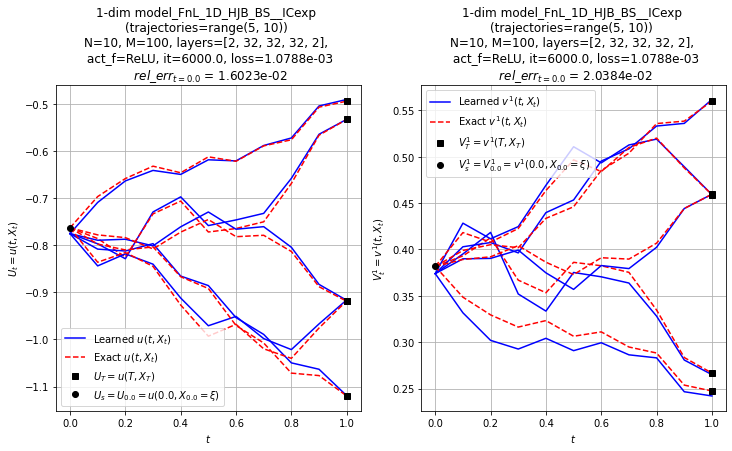

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
figY = plot_results(model, resY, r=range(5,10), flag_err_info=1, ax=ax1, Y_name='U')
figV1 = plot_results(model, resV1, r=range(5,10), flag_err_info=1, u_name='v^1', Y_name='V^1', ax=ax2)
model.Xi, Xi

In [69]:
data = '20241024_2124'
fname = f'{model.name} u&v s{model.s},T{model.T};'+\
    f' l{len(model.layers)-2}x{model.layers[1]}, N{model.N}, M{model.M} act_f_{model.act_func_name} it{model.iterations}'
f.savefig( f'{fname}_{data}.png' )

In [ ]:
## model
M = 100 # number of trajectories (batch size)
N = 10 # 20 # 50 # number of time snapshots

layer_size = 32 # 64 # 32 # 256
HL = 3 # 4    
hlayers = HL*[layer_size] 
print( hlayers )

Xi = np.array([[0.5]]) #  np.array([1.0,0.5]*int(D/2))[None,:]
print(Xi.shape, Xi)
T = 1.0 # 0.6 # 1.0
s = 0.8 # 0.8 # 0.5
act_func = tf.tanh # tf.nn.relu #   tf.sin 

model = Prob_HJB_BS(Xi, T,   M, N,   hlayers, act_func = act_func, s=s, 
                                     # mu=0.02, sigma=0.1,
                                     gamma=0.5)
model.loss_n = 0 #-1
model.flag_v1eqDu = False # True # False

print( f'model = {model}' )
print( f'model.loss_n = {model.loss_n}' )
print( f'model.tool = {model.tool}' )
print( f"hasattr(self, 'act_func')={hasattr(model, 'act_func')}" )
print( f'model.loss_history={model.loss_history}, model.it_loss_history={model.it_loss_history}' )
# print(model.net_out_size, model.flag_v1eqDu)
print( f'model.flag_v1eqDu={model.flag_v1eqDu}' )

In [26]:
figY.savefig('{}.pdf'.format(f'./figures/{model.name}_{model.D}D_trajectories0-4_')) # date_time
# savefig('./figures/BSB_20230721_50_errors', crop = False)

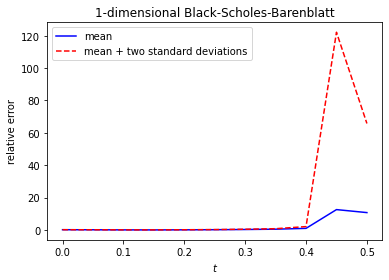

In [27]:
    errors = np.abs( (Y_test-Y_pred)/Y_test ) # np.sqrt( (Y_test-Y_pred)**2/Y_test**2 )
    mean_errors = np.mean(errors,0)
    std_errors = np.std(errors,0)
    
    plt.figure()
    plt.plot(t_test[0,:,0],mean_errors,'b',label='mean')
    plt.plot(t_test[0,:,0],mean_errors+2*std_errors,'r--',label='mean + two standard deviations')
    plt.xlabel('$t$')
    plt.ylabel('relative error')
    plt.title( f'{D}-dimensional Black-Scholes-Barenblatt')
    plt.legend()
    
    # savefig('./figures/BSB_Apr18_50_errors', crop = False)

In [37]:
plt.savefig('{}.pdf'.format('./figures/BSB_20240407_10_errors'))
# savefig('./figures/BSB_20230721_50_errors', crop = False)

<Figure size 432x288 with 0 Axes>